In [199]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [3]:
#Read in the csv file and convert to a Pandas dataframe
football_df = pd.read_csv("Data\\footballl_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [8]:
pd.set_option('display.max_columns', None)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [4]:
football_df.shape

(10754, 22)

In [10]:
football_df.head()

player               team  \
0        /david-de-gea/profil/spieler/59377  Manchester United   
1       /jack-butland/profil/spieler/128899  Manchester United   
2          /tom-heaton/profil/spieler/34130  Manchester United   
3  /lisandro-martinez/profil/spieler/480762  Manchester United   
4     /raphael-varane/profil/spieler/164770  Manchester United   

                name              position  height   age  appearance  \
0       David de Gea            Goalkeeper   189.0  32.0         104   
1       Jack Butland            Goalkeeper   196.0  30.0          15   
2         Tom Heaton            Goalkeeper   188.0  37.0           4   
3  Lisandro Martínez  Defender Centre-Back   175.0  25.0          82   
4     Raphaël Varane  Defender Centre-Back   191.0  30.0          63   

      goals   assists  yellow cards  second yellow cards  red cards  \
0  0.000000  0.000000      0.009585                  0.0        0.0   
1  0.000000  0.000000      0.069018                  0.0        0.0   
2  0.000000  0.000000      0.000000                  0.0        0.0   
3  0.028090  0.056180      0.224719                  0.0        0.0   
4  0.017889  0.017889      0.053667                  0.0        0.0   

   goals conceded  clean sheets  minutes played  days_injured  games_injured  \
0        1.217252      0.335463            9390            42              5   
1        1.242331      0.207055            1304           510             58   
2        0.616438      0.924658             292           697             84   
3        0.000000      0.000000            6408           175             22   
4        0.000000      0.000000            5031           238             51   

   award  current_value  highest_value  position_encoded  winger  
0     13       15000000       70000000                 1       0  
1      1        1500000       22000000                 1       0  
2      4         600000        6000000                 1       0  
3      9       50000000       50000000                 2       0  
4     21       40000000       80000000                 2       0

In [11]:
football_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

#### 1. Reliability:


#### 2. Timeliness: 


*************************************
The data was collected for 2 season 2021-2022 and 2022-2023
*************************************

#### 3. Consistency: 



#### 4. Relevance: 



********************************************
The data was collected for several top-tier global football leagues (including Saudi pro league):
- **Asian:** leagues, comprising J-League in Japan, Saudi Pro League in Saudi Arabia, K-League 1 in South Korea, and A-League in Australia.

- **European:** leagues, including the Premier League and Championship in England, Bundesliga in Germany, La Liga in Spain, Serie A in Italy, Ligue 1 in France, Eredivisie in the Netherlands, Liga NOS in Portugal, Premier Liga in Russia, Super Lig in Turkey, and Bundesliga in Austria.

- **African:** league, namely the DStv Premiership in South Africa.

- **American:** leagues, including Brasileiro in Brazil, Major League Soccer in the United States, Primera División in Argentina, and Liga MX in Mexico.

#### 5. Uniqueness: 



In [13]:
football_df.duplicated().sum()

0

In [14]:
football_df[football_df.duplicated()]

Empty DataFrame
Columns: [player, team, name, position, height, age, appearance, goals, assists, yellow cards, second yellow cards, red cards, goals conceded, clean sheets, minutes played, days_injured, games_injured, award, current_value, highest_value, position_encoded, winger]
Index: []

In [66]:
# go to delete duplicates columns

#### 6. Completeness: 


In [20]:
#Display number missing values per column
football_df.isnull().sum()


player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [68]:
# go to clean them 

#### 7. Check Accuracy:


In [21]:
# check columns types 
football_df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [23]:
football_df.head(2)

player               team          name  \
0   /david-de-gea/profil/spieler/59377  Manchester United  David de Gea   
1  /jack-butland/profil/spieler/128899  Manchester United  Jack Butland   

     position  height   age  appearance  goals  assists  yellow cards  \
0  Goalkeeper   189.0  32.0         104    0.0      0.0      0.009585   
1  Goalkeeper   196.0  30.0          15    0.0      0.0      0.069018   

   second yellow cards  red cards  goals conceded  clean sheets  \
0                  0.0        0.0        1.217252      0.335463   
1                  0.0        0.0        1.242331      0.207055   

   minutes played  days_injured  games_injured  award  current_value  \
0            9390            42              5     13       15000000   
1            1304           510             58      1        1500000   

   highest_value  position_encoded  winger  
0       70000000                 1       0  
1       22000000                 1       0

In [25]:
football_df['position_encoded'].unique()

array([1, 2, 3, 4], dtype=int64)

In [26]:
football_df['winger'].unique()

array([0, 1], dtype=int64)

In [22]:
football_df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [28]:
# go to clean them 
categorical_features = ['team', 'position', 'position_encoded', 'winger']
numeric_features = ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
                    'clean sheets', 'minutes played', 'days_injured', 'games_injured', 'award', 'current_value', 'highest_value']

In [30]:
pd.set_option('display.max_rows', None)

In [31]:
# check outliers 
for i in categorical_features:
    print (football_df[i].value_counts())

team
Daejeon Hana Citizen                   46
Jeonbuk Hyundai Motors                 46
FC Seoul                               45
Gangwon FC                             43
Daegu FC                               42
Al-Batin FC                            41
Santos FC                              40
Swallows FC                            40
Sagan Tosu                             40
Royal AM FC                            40
Marumo Gallants FC                     39
Vissel Kobe                            39
Botafogo de Futebol e Regatas          38
Incheon United                         38
Suwon Samsung Bluewings                38
Mamelodi Sundowns FC                   38
São Paulo Futebol Clube                37
Kashiwa Reysol                         37
Yokohama FC                            37
FC Tokyo                               37
Kyoto Sanga                            37
Cerezo Osaka                           37
Yokohama F. Marinos                    37
Al-Taawoun FC                

In [ ]:
original_football_df = football_df.copy()

In [36]:
football_df[football_df['current_value'] > 100000000]

player                 team  \
450        /phil-foden/profil/spieler/406635      Manchester City   
453    /erling-haaland/profil/spieler/418560      Manchester City   
474       /bukayo-saka/profil/spieler/433177           Arsenal FC   
960   /jude-bellingham/profil/spieler/581678    Borussia Dortmund   
1017    /jamal-musiala/profil/spieler/580195        Bayern Munich   
1521  /vinicius-junior/profil/spieler/371998          Real Madrid   
2644    /kylian-mbappe/profil/spieler/342229  Paris Saint-Germain   

                 name                    position  height   age  appearance  \
450        Phil Foden           Attack-LeftWinger   171.0  23.0          93   
453    Erling Haaland       Attack Centre-Forward   195.0  22.0          83   
474       Bukayo Saka          Attack-RightWinger   178.0  21.0          91   
960   Jude Bellingham    midfield-CentralMidfield   186.0  19.0          86   
1017    Jamal Musiala  midfield-AttackingMidfield   184.0  20.0          87   
1521  Vinicius Junior           Attack-LeftWinger   176.0  22.0         107   
2644    Kylian Mbappé       Attack Centre-Forward   178.0  24.0          89   

         goals   assists  yellow cards  second yellow cards  red cards  \
450   0.446612  0.292608      0.077002                  0.0   0.000000   
453   1.118270  0.234699      0.124252                  0.0   0.000000   
474   0.342109  0.228073      0.164719                  0.0   0.000000   
960   0.244798  0.257038      0.269278                  0.0   0.000000   
1017  0.431655  0.395683      0.071942                  0.0   0.000000   
1521  0.448356  0.408502      0.229160                  0.0   0.009963   
2644  0.963082  0.433387      0.204655                  0.0   0.000000   

      goals conceded  clean sheets  minutes played  days_injured  \
450              0.0           0.0            5844           121   
453              0.0           0.0            6519           204   
474              0.0           0.0            7103            27   
960              0.0           0.0            7353            19   
1017             0.0           0.0            5004            66   
1521             0.0           0.0            9033            70   
2644             0.0           0.0            7476           139   

      games_injured  award  current_value  highest_value  position_encoded  \
450              23     15      110000000      110000000                 4   
453              36     17      170000000      170000000                 4   
474               2      2      110000000      110000000                 4   
960               4      2      120000000      120000000                 3   
1017              6     11      110000000      110000000                 3   
1521             12     12      150000000      150000000                 4   
2644             23     37      180000000      200000000                 4   

      winger  
450        1  
453        0  
474        1  
960        0  
1017       0  
1521       1  
2644       0

In [72]:
football_df = football_df[football_df['goals'] < 1.5]

In [80]:
football_df = football_df[(football_df['height'] >= 165) & (football_df['height'] <= 200)]

In [88]:
football_df = football_df[(football_df['age'] > 16) & (football_df['age'] < 40)]

In [101]:
football_df = football_df[football_df['assists'] < 1]

In [131]:
football_df = football_df[football_df['yellow cards'] < 0.475]

In [122]:
football_df = football_df[football_df['second yellow cards'] < 0.1]

In [142]:
football_df = football_df[football_df['red cards'] < 0.1]

In [153]:
football_df = football_df[football_df['goals conceded'] <= 2]

In [165]:
football_df = football_df[football_df['games_injured'] < 80]

In [179]:
#🤣معصي اشيلهم
football_df[football_df['award'] > 40]

player                 team  \
1507         /david-alaba/profil/spieler/59016          Real Madrid   
1525       /karim-benzema/profil/spieler/18922          Real Madrid   
1549  /robert-lewandowski/profil/spieler/38253         FC Barcelona   
2643        /lionel-messi/profil/spieler/28003  Paris Saint-Germain   
8682       /andres-iniesta/profil/spieler/7600          Vissel Kobe   
9433    /cristiano-ronaldo/profil/spieler/8198          Al-Nassr FC   

                    name                  position  height   age  appearance  \
1507         David Alaba      Defender Centre-Back   180.0  30.0          85   
1525       Karim Benzema     Attack Centre-Forward   185.0  35.0          89   
1549  Robert Lewandowski     Attack Centre-Forward   185.0  34.0          92   
2643        Lionel Messi        Attack-RightWinger   170.0  35.0          75   
8682      Andrés Iniesta  midfield-CentralMidfield   171.0  39.0           4   
9433   Cristiano Ronaldo     Attack Centre-Forward   187.0  38.0          74   

         goals   assists  yellow cards  second yellow cards  red cards  \
1507  0.063649  0.089109      0.101839             0.000000        0.0   
1525  0.894040  0.250331      0.023841             0.000000        0.0   
1549  0.938442  0.169598      0.067839             0.011307        0.0   
2643  0.442464  0.483945      0.013827             0.000000        0.0   
8682  0.588235  0.000000      0.000000             0.000000        0.0   
9433  0.617780  0.105475      0.256153             0.000000        0.0   

      goals conceded  clean sheets  minutes played  days_injured  \
1507             0.0           0.0            7070           123   
1525             0.0           0.0            7550           156   
1549             0.0           0.0            7960           139   
2643             0.0           0.0            6509           167   
8682             0.0           0.0             153           315   
9433             0.0           0.0            5973           168   

      games_injured  award  current_value  highest_value  position_encoded  \
1507             26     43       40000000       65000000                 2   
1525             26     53       25000000       60000000                 4   
1549             22     65       30000000       90000000                 4   
2643             30     92       45000000      180000000                 4   
8682             51     42        1200000       70000000                 3   
9433             27     90       15000000      120000000                 4   

      winger  
1507       0  
1525       0  
1549       0  
2643       1  
8682       0  
9433       0

In [186]:
football_df[football_df['minutes played'] > 9000]

player               team  \
0              /david-de-gea/profil/spieler/59377  Manchester United   
22         /bruno-fernandes/profil/spieler/240306  Manchester United   
372                /alisson/profil/spieler/105470       Liverpool FC   
1504      /thibaut-courtois/profil/spieler/108390        Real Madrid   
1521       /vinicius-junior/profil/spieler/371998        Real Madrid   
1550           /rui-patricio/profil/spieler/45026            AS Roma   
4279  /odysseas-vlachodimos/profil/spieler/124419         SL Benfica   

                      name                    position  height   age  \
0             David de Gea                  Goalkeeper   189.0  32.0   
22         Bruno Fernandes  midfield-AttackingMidfield   179.0  28.0   
372                Alisson                  Goalkeeper   193.0  30.0   
1504      Thibaut Courtois                  Goalkeeper   200.0  31.0   
1521       Vinicius Junior           Attack-LeftWinger   176.0  22.0   
1550          Rui Patrício                  Goalkeeper   190.0  35.0   
4279  Odysseas Vlachodimos                  Goalkeeper   191.0  29.0   

      appearance     goals   assists  yellow cards  second yellow cards  \
0            104  0.000000  0.000000      0.009585                  0.0   
22           105  0.239335  0.289197      0.219391                  0.0   
372          101  0.000000  0.000000      0.009868                  0.0   
1504         101  0.000000  0.000000      0.019481                  0.0   
1521         107  0.448356  0.408502      0.229160                  0.0   
1550         105  0.000000  0.000000      0.075710                  0.0   
4279         102  0.000000  0.000000      0.058645                  0.0   

      red cards  goals conceded  clean sheets  minutes played  days_injured  \
0      0.000000        1.217252      0.335463            9390            42   
22     0.000000        0.000000      0.000000            9025            14   
372    0.000000        0.986842      0.434211            9120           216   
1504   0.000000        0.925325      0.379870            9240           183   
1521   0.009963        0.000000      0.000000            9033            70   
1550   0.000000        1.003155      0.397476            9510            75   
4279   0.000000        0.879670      0.449609            9208            54   

      games_injured  award  current_value  highest_value  position_encoded  \
0                 5     13       15000000       70000000                 1   
22                2     11       75000000       90000000                 3   
372              28      7       45000000       90000000                 1   
1504             24     18       45000000       75000000                 1   
1521             12     12      150000000      150000000                 4   
1550              9      8        5000000       20000000                 1   
4279              8      4       16000000       18000000                 1   

      winger  
0          0  
22         0  
372        0  
1504       0  
1521       1  
1550       0  
4279       0

In [181]:
filtered_football_df = football_df.copy()

In [180]:
football_df.shape

(9650, 22)

## 2. Data Cleaning: 





In [80]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [ ]:
# go back to 7th dimension Accuracy 

## 3. Univariate Analysis: 



In [33]:
football_df.head(1)

player               team          name  \
0  /david-de-gea/profil/spieler/59377  Manchester United  David de Gea   

     position  height   age  appearance  goals  assists  yellow cards  \
0  Goalkeeper   189.0  32.0         104    0.0      0.0      0.009585   

   second yellow cards  red cards  goals conceded  clean sheets  \
0                  0.0        0.0        1.217252      0.335463   

   minutes played  days_injured  games_injured  award  current_value  \
0            9390            42              5     13       15000000   

   highest_value  position_encoded  winger  
0       70000000                 1       0

In [166]:
fig = make_subplots(rows=2, subplot_titles=("current_value 1", "highest_value 2"))

current_v_hist = px.histogram(football_df, x="current_value")
highest_v_hist = px.histogram(football_df, x='highest_value')


fig.add_trace(current_v_hist.data[0], row=1, col=1)
fig.add_trace(highest_v_hist.data[0], row=2, col=1)

fig.show()

In [167]:
fig = px.histogram(football_df, x='goals')
fig.update_layout(
    width=1400,
    height=600 
)
fig.show()

In [168]:
fig = px.histogram(football_df, x='assists')
fig.update_layout(
    width=1400,
    height=600 
)
fig.show()

In [169]:
fig = px.histogram(football_df, x='goals conceded')
fig.update_layout(
    width=1400,
    height=600 
)
fig.show()

In [170]:

fig = px.histogram(football_df, x='age')
fig.update_layout(
    width=800,
    height=300 
)
fig.show()

In [171]:
fig = px.histogram(football_df, x='height')
fig.update_layout(
    width=800,
    height=300 
)
fig.show()

In [172]:
fig = px.histogram(football_df, x='appearance')
fig.update_layout(
    width=800,
    height=300 
)
fig.show()

In [173]:
fig = px.histogram(football_df, x='yellow cards')
fig.update_layout(
    width=800,
    height=300 
)
fig.show()

In [174]:
fig = px.histogram(football_df, x='second yellow cards')
fig.update_layout(
    width=800,
    height=300 
)
fig.show()

In [175]:
fig = px.histogram(football_df, x='red cards')
fig.update_layout(
    width=800,
    height=300 
)
fig.show()

In [176]:
fig = px.histogram(football_df, x='games_injured')
fig.update_layout(
    width=800,
    height=300 
)
fig.show()

In [177]:
fig = px.histogram(football_df, x='award')
fig.update_layout(
    width=800,
    height=300 
)
fig.show()

In [184]:
fig = px.histogram(football_df, x='minutes played')
fig.update_layout(
    width=800,
    height=300 
)
fig.show()

#### 2. Feature engineering


In [183]:
football_df.head(1)

player               team          name  \
0  /david-de-gea/profil/spieler/59377  Manchester United  David de Gea   

     position  height   age  appearance  goals  assists  yellow cards  \
0  Goalkeeper   189.0  32.0         104    0.0      0.0      0.009585   

   second yellow cards  red cards  goals conceded  clean sheets  \
0                  0.0        0.0        1.217252      0.335463   

   minutes played  days_injured  games_injured  award  current_value  \
0            9390            42              5     13       15000000   

   highest_value  position_encoded  winger  
0       70000000                 1       0

In [182]:
categorical_features

['team', 'position', 'position_encoded', 'winger']

In [320]:
ml_df = football_df.copy()

In [321]:
# one hot coding
ml_df = pd.get_dummies(ml_df, columns=categorical_features)

In [322]:
ml_df.shape

(9650, 414)

In [323]:
ml_df = ml_df.drop(columns=['player', 'name'])

#### 3. Feature selection

In [324]:
correlation = ml_df.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value                               1.000000
highest_value                               0.845622
minutes played                              0.418965
appearance                                  0.418733
award                                       0.310925
team_Manchester City                        0.214685
assists                                     0.197673
team_Bayern Munich                          0.185021
team_Arsenal FC                             0.179816
goals                                       0.176177
team_Real Madrid                            0.175689
games_injured                               0.166968
team_Paris Saint-Germain                    0.166571
team_Chelsea FC                             0.156432
team_FC Barcelona                           0.155180
team_Liverpool FC                           0.143780
team_Manchester United                      0.133848
days_injured                                0.131252
team_Tottenham Hotspur                      0.

In [325]:
# Set the correlation threshold
threshold = 0.16  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'goals', 'assists', 'minutes played', 'games_injured',
       'award', 'current_value', 'highest_value', 'team_Arsenal FC',
       'team_Bayern Munich', 'team_Manchester City',
       'team_Paris Saint-Germain', 'team_Real Madrid'],
      dtype='object')

In [326]:
# selected_features =['appearance', 'goals', 'assists', 'minutes played', 'games_injured',
#        'award', 'current_value', 'highest_value']

In [327]:
ml_df = ml_df[selected_features]
ml_df.head()

appearance     goals   assists  minutes played  games_injured  award  \
0         104  0.000000  0.000000            9390              5     13   
1          15  0.000000  0.000000            1304             58      1   
3          82  0.028090  0.056180            6408             22      9   
4          63  0.017889  0.017889            5031             51     21   
5          68  0.037799  0.000000            4762             27      1   

   current_value  highest_value  team_Arsenal FC  team_Bayern Munich  \
0       15000000       70000000            False               False   
1        1500000       22000000            False               False   
3       50000000       50000000            False               False   
4       40000000       80000000            False               False   
5       25000000       70000000            False               False   

   team_Manchester City  team_Paris Saint-Germain  team_Real Madrid  
0                 False                     False             False  
1                 False                     False             False  
3                 False                     False             False  
4                 False                     False             False  
5                 False                     False             False

#### 4. Prepare train and test data

In [328]:
# Prepare data
X = ml_df.drop(['current_value'], axis=1)
y = ml_df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Buliding the Model

In [329]:
model = LinearRegression()

## Train the Model

In [330]:
model.fit(X_train_scaled, y_train)

LinearRegression()

## Test the Model

In [331]:
y_pred = model.predict(X_test_scaled)

## Interpretation of the Model

In [332]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
appearance               -1.032823e+06
goals                     2.791289e+05
assists                   2.429787e+05
minutes played            1.869786e+06
games_injured            -6.769424e+05
award                    -1.906534e+06
highest_value             8.233476e+06
team_Arsenal FC           6.125407e+05
team_Bayern Munich        7.642338e+05
team_Manchester City      8.204704e+05
team_Paris Saint-Germain  3.360689e+05
team_Real Madrid          2.269270e+05

In [333]:
print(model.intercept_) 

3835562.8238341967


## Evaluating the Model 

1. Mean Square Error

In [334]:
y_base = [y_train.mean()] * len(y_test)

In [335]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 93260375580586.48


In [336]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 19377807381017.65
Mean Squared Error for testing: 24853829329860.95


2. Mean Absolute Error

In [337]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 4569522.215361485


In [338]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 2131005.048278708
Mean Absolute Error for testing: 2268274.268890213


3. Root Mean Absolute Error

In [339]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 2137.6440806087166


In [340]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 4402023.1009182185
Root Mean Squared Error for testing: 4985361.504430842


4. R Square

In [341]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.7798681884657462
R Square for testing: 0.7334718467145456


#### Predictions vs. Real Values

In [342]:
predictions = model.predict(X_test_scaled)
#predictions

In [343]:
Real_Values = np.array(y_test)
#Real_Values

In [344]:
fig = px.scatter(x=Real_Values, y=predictions, labels={'x':'Real Values', 'y':'Predictions'})

fig.show()

C:\Users\Sulaiman\AppData\Local\Temp\ipykernel_31504\1326397652.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




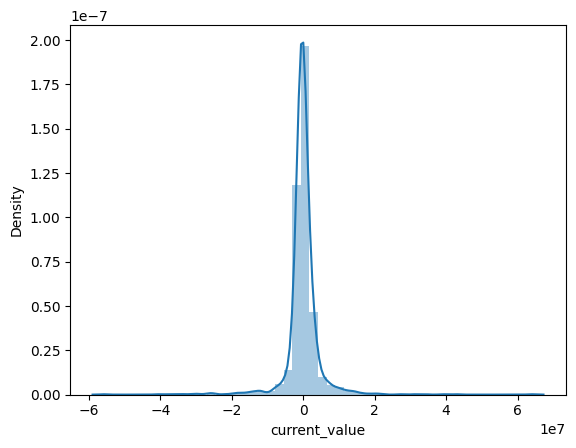

In [345]:
sns.distplot((y_test-predictions),bins=50);

# My insights 
the model isn't great needs more revisions, if there was league name column that will help a lot since every football league bay different prices for players due to league competition 